Aqui está a versão em Notebook do projeto em que estou fazendo a análise exploratória e o tratamento dos dados "Jogos mais vendidos de Nintendo Switch".
Disponível em "https://www.kaggle.com/datasets/kabhishm/best-selling-nintendo-switch-video-games"

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt

Importar dados e visualizar informações importantes

In [2]:
dataset = pd.read_csv("best_selling_switch_games.csv")
# visulizar
dataset.head()

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15


Primeiro problema é dar nomes as colunas

In [3]:
dataset.columns = ["Jogos", "Copias_Vendidas", "Genero", "Desenvolvedor", "Publicador", "Desde", "Data de Lançamento"]

Exploração de dados categóricos

Gênero:  Há necessidade de arupá-los em mesmo gênero para melhor visualização

<AxesSubplot: >

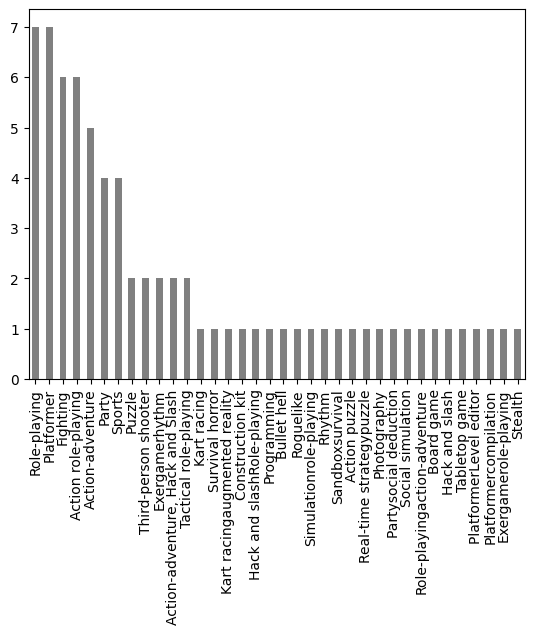

In [4]:
gen = dataset['Genero'].value_counts()
gen
gen.plot.bar(color='gray')

Desenvolvedor: Vejo a mesma necessidade.

<AxesSubplot: >

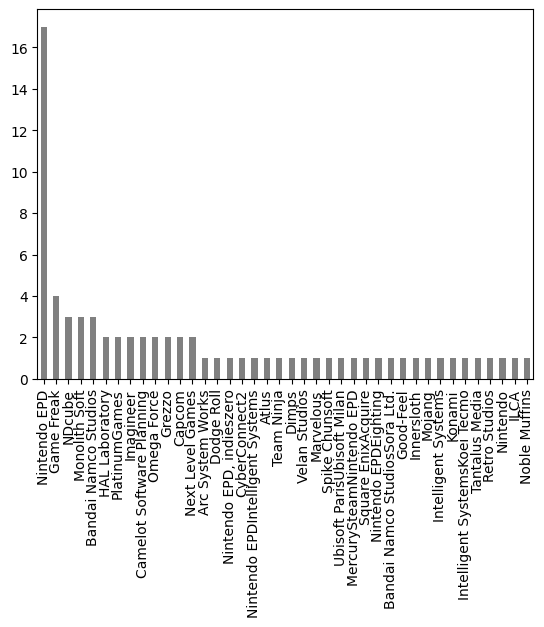

In [5]:
des = dataset['Desenvolvedor'].value_counts()
des
des.plot.bar(color='gray')

Publicadora: O problema persiste

<AxesSubplot: >

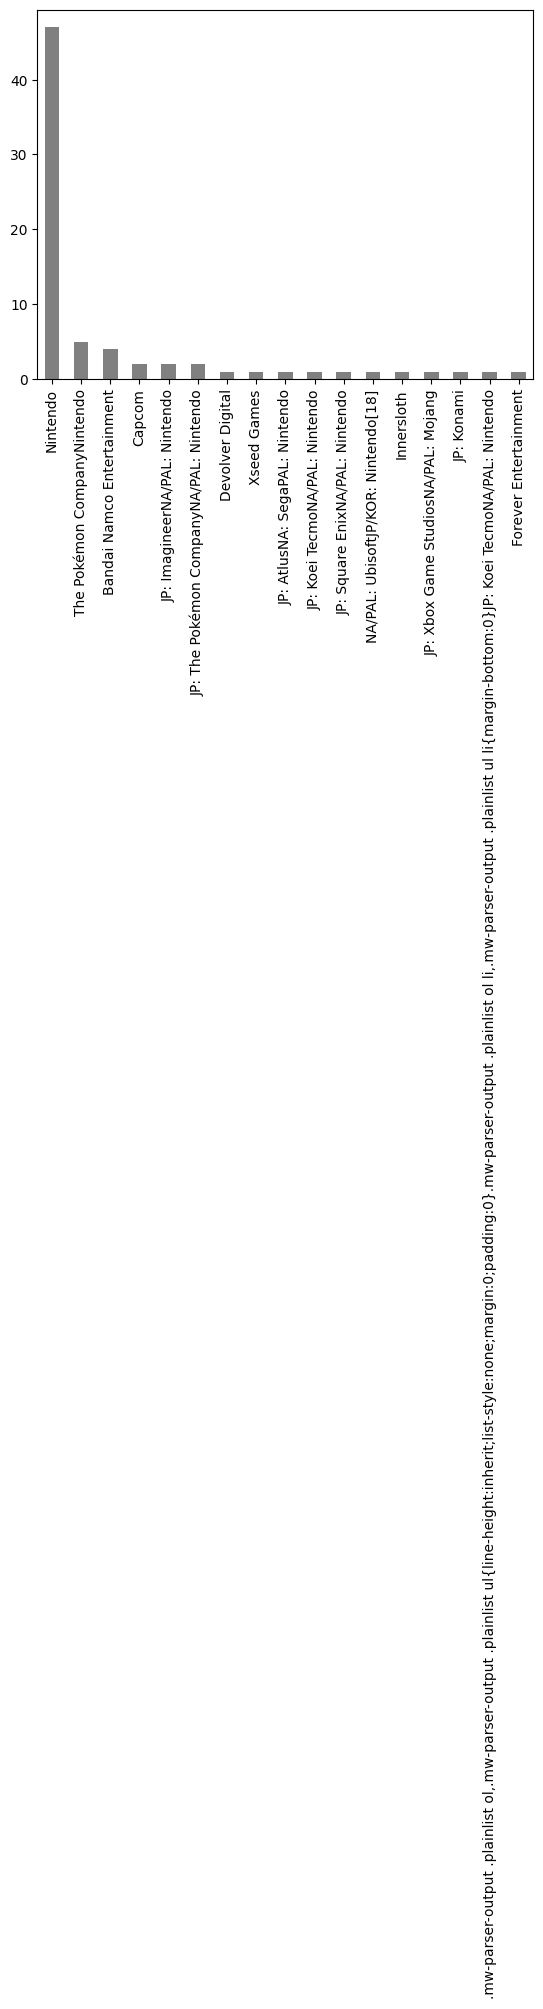

In [6]:
pub = dataset['Publicador'].value_counts()
pub
pub.plot.bar(color='gray')

Exploração das colunas numéricas.

Cópias Vendidas: Procurar padrão dos que venderam muito.

Text(0.5, 1.0, 'Copias_Vendidas')

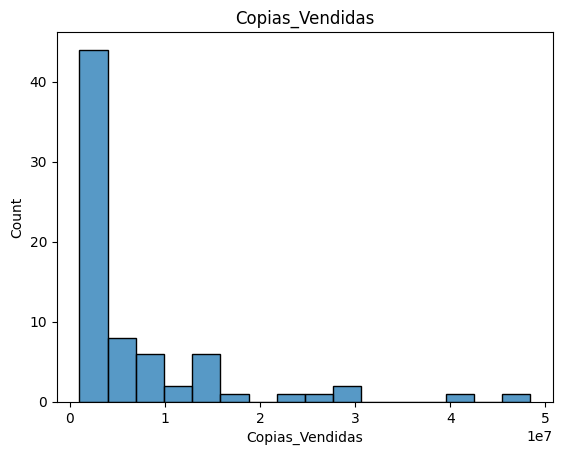

In [7]:
dataset['Copias_Vendidas'].describe()
srn.histplot(dataset['Copias_Vendidas']).set_title('Copias_Vendidas')

Procurar valores nulos

In [8]:
dataset.isnull().sum()

Jogos                 0
Copias_Vendidas       0
Genero                0
Desenvolvedor         0
Publicador            0
Desde                 0
Data de Lançamento    0
dtype: int64

Tratamento de dados categóricos.

Padronizar de acordo com o domínio (Gênero).

Em "Others" foram agrupados todos os gêneros com apenas um jogo.

In [9]:
dataset.loc[dataset['Genero'].isin(['Action puzzle', 'Action role-playing',
                                   'Action-adventure', 'Action-adventure, Hack and Slash']), 'Genero'] = "Action"
dataset.loc[dataset['Genero'].isin(
    ['Exergamerhythm', 'Exergamerole-playing']), 'Genero'] = "Exergame"
dataset.loc[dataset['Genero'] ==
            'Hack and slashRole-playing', 'Genero'] = "Hack and slash"
dataset.loc[dataset['Genero'].isin(
    ['Kart racing', 'Kart racingaugmented reality']), 'Genero'] = "Kart"
dataset.loc[dataset['Genero'] == 'Partysocial deduction', 'Genero'] = "Party"
dataset.loc[dataset['Genero'].isin(
    ['PlatformerLevel editor', 'Platformercompilation']), 'Genero'] = "Platformer"
dataset.loc[dataset['Genero'].isin(
    ['Role-playingaction-adventure', 'Simulationrole-playing', 'Tactical role-playing']), 'Genero'] = "Role-playing"
dataset.loc[dataset['Genero'] ==
            'Real-time strategypuzzle', 'Genero'] = "Puzzle"
dataset.loc[dataset['Genero'].isin(
    ['Sandboxsurvival', 'Survival horror']), 'Genero'] = "Survival"
dataset.loc[dataset['Genero'].isin(['Board game', 'Bullet hell', 'Construction kit', 'Photography', 'Programming',
                                   'Rhythm', 'Roguelike', 'Social simulation', 'Stealth', 'Tabletop game']), 'Genero'] = "Others"

Visualizar o resultado

In [10]:
gen = dataset['Genero'].value_counts()
gen

Action                  14
Role-playing            11
Others                  10
Platformer               9
Fighting                 6
Party                    5
Sports                   4
Exergame                 3
Puzzle                   3
Kart                     2
Third-person shooter     2
Hack and slash           2
Survival                 2
Name: Genero, dtype: int64

Padronizar de acordo com o domínio (Desenvolvedora).

Em "Others" foram agrupados todas desenvolvedoras com apenas uma incidência.

In [11]:
dataset.loc[dataset['Desenvolvedor'] == 'Bandai Namco StudiosSora Ltd.',
            'Desenvolvedor'] = "Bandai Namco Studios"
dataset.loc[dataset['Desenvolvedor'] == 'Intelligent SystemsKoei Tecmo',
            'Desenvolvedor'] = "Intelligent Systems"
dataset.loc[dataset['Desenvolvedor'].isin(['Nintendo EPD', 'Nintendo EPD, indieszero', 'Nintendo EPDIntelligent Systems',
                                          'MercurySteamNintendo EPD', 'Nintendo EPDEighting', 'Retro Studios']), 'Desenvolvedor'] = "Nintendo"
dataset.loc[dataset['Desenvolvedor'].isin(['Arc System Works', 'Atlus', 'CyberConnect2', 'Dimps', 'Dodge Roll', 'Good-Feel', 'ILCA', 'Innersloth', 'Konami', 'Marvelous', 'Mojang',
                                          'Noble Muffins', 'Spike Chunsoft', 'Square EnixAcquire', 'Tantalus Media', 'Team Ninja', 'Ubisoft ParisUbisoft Milan', 'Velan Studios']), 'Desenvolvedor'] = "Others"

Visualizar o resultado

In [12]:
des = dataset['Desenvolvedor'].value_counts()
des

Nintendo                     23
Others                       18
Bandai Namco Studios          4
Game Freak                    4
NDcube                        3
Monolith Soft                 3
Next Level Games              2
Capcom                        2
Grezzo                        2
HAL Laboratory                2
Camelot Software Planning     2
Omega Force                   2
Intelligent Systems           2
PlatinumGames                 2
Imagineer                     2
Name: Desenvolvedor, dtype: int64

Padronizar de acordo com o domínio (Publicadora).

Em "Others" foram agrupados todas publicadoras com apenas uma incidência.

In [13]:
dataset.loc[dataset['Publicador'].isin(['.mw-parser-output .plainlist ol,.mw-parser-output .plainlist ul{line-height:inherit;list-style:none;margin:0;padding:0}.mw-parser-output .plainlist ol li,.mw-parser-output .plainlist ul li{margin-bottom:0}JP: Koei TecmoNA/PAL: Nintendo',
                                        'JP: AtlusNA: SegaPAL: Nintendo', 'JP: ImagineerNA/PAL: Nintendo', 'JP: Koei TecmoNA/PAL: Nintendo', 'JP: Square EnixNA/PAL: Nintendo', 'JP: The Pokémon CompanyNA/PAL: Nintendo', 'NA/PAL: UbisoftJP/KOR: Nintendo[18]', 'The Pokémon CompanyNintendo']), 'Publicador'] = "Nintendo"
dataset.loc[dataset['Publicador'].isin(['Devolver Digital', 'Forever Entertainment', 'Innersloth',
                                       'JP: Konami', 'JP: Xbox Game StudiosNA/PAL: Mojang', 'Xseed Games']), 'Publicador'] = "Others"

Visualizar o resultado

In [14]:
pub = dataset['Publicador'].value_counts()
pub

Nintendo                      61
Others                         6
Bandai Namco Entertainment     4
Capcom                         2
Name: Publicador, dtype: int64

Análise dos dados.

Gênero. Podemos ver os gêneros que mais fizeram sucesso no Nintendo Switch

In [15]:
print(gen)

Action                  14
Role-playing            11
Others                  10
Platformer               9
Fighting                 6
Party                    5
Sports                   4
Exergame                 3
Puzzle                   3
Kart                     2
Third-person shooter     2
Hack and slash           2
Survival                 2
Name: Genero, dtype: int64


Jogos mais vendidos de Ação

Text(0.5, 1.0, 'Jogos mais vendidos de Ação')

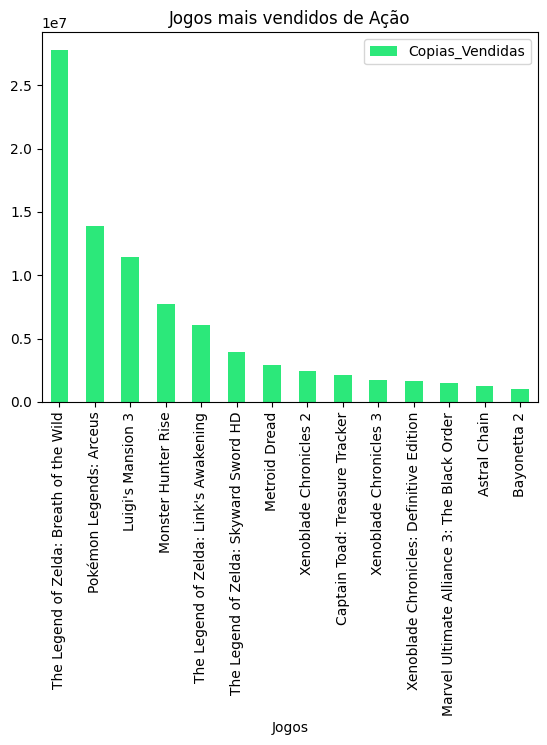

In [16]:
acao = dataset.loc[dataset['Genero'] == 'Action']
acao.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#2ce87a'])
plt.title("Jogos mais vendidos de Ação")

Jogos mais vendidos de Role-Playing

Text(0.5, 1.0, 'Jogos mais vendidos de Role-playing')

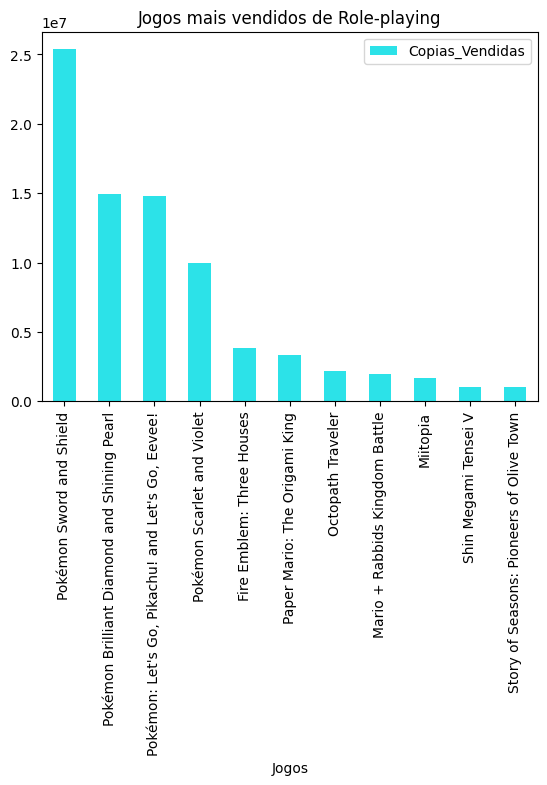

In [17]:
role = dataset.loc[dataset['Genero'] == 'Role-playing']
role.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#2ce2e8'])
plt.title("Jogos mais vendidos de Role-playing")

Jogos mais vendidos de Plataforma

Text(0.5, 1.0, 'Jogos mais vendidos de Plataforma')

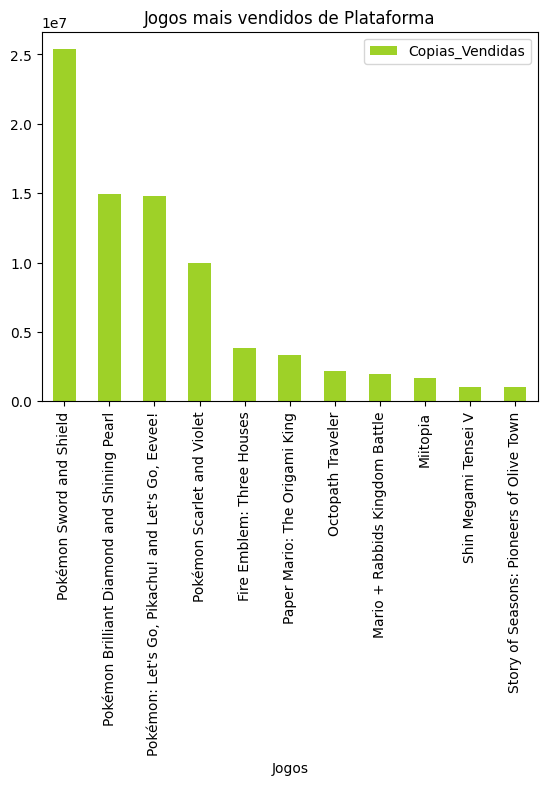

In [18]:
plat = dataset.loc[dataset['Genero'] == 'Role-playing']
plat.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#9ed128'])
plt.title("Jogos mais vendidos de Plataforma")

Jogos mais vendidos dos demais gêneros.

É interessante notar a disparidade do jogo "Animal Crossing" do restante. Também vemos nomes que podem ser associados a outros jogos

Text(0.5, 1.0, 'Jogos mais vendidos de outros gêneros')

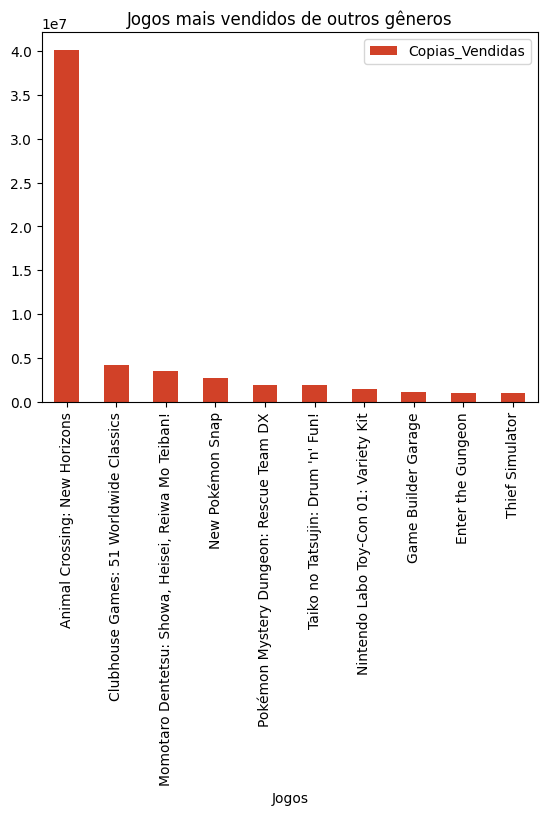

In [19]:
ou = dataset.loc[dataset['Genero'] == 'Others']
ou.iloc[:, 0:2].plot.bar(x='Jogos', color=['#d14128'])
plt.title("Jogos mais vendidos de outros gêneros")

Análise por Desenvolvedora.

Como esperado, a Nintendo carrega o topo da lista do próprio console.

In [20]:
print(des)

Nintendo                     23
Others                       18
Bandai Namco Studios          4
Game Freak                    4
NDcube                        3
Monolith Soft                 3
Next Level Games              2
Capcom                        2
Grezzo                        2
HAL Laboratory                2
Camelot Software Planning     2
Omega Force                   2
Intelligent Systems           2
PlatinumGames                 2
Imagineer                     2
Name: Desenvolvedor, dtype: int64


Jogos mais vendidos desenvolvidos pela Nintendo

Text(0.5, 1.0, 'Jogos mais vendidos da Nintendo')

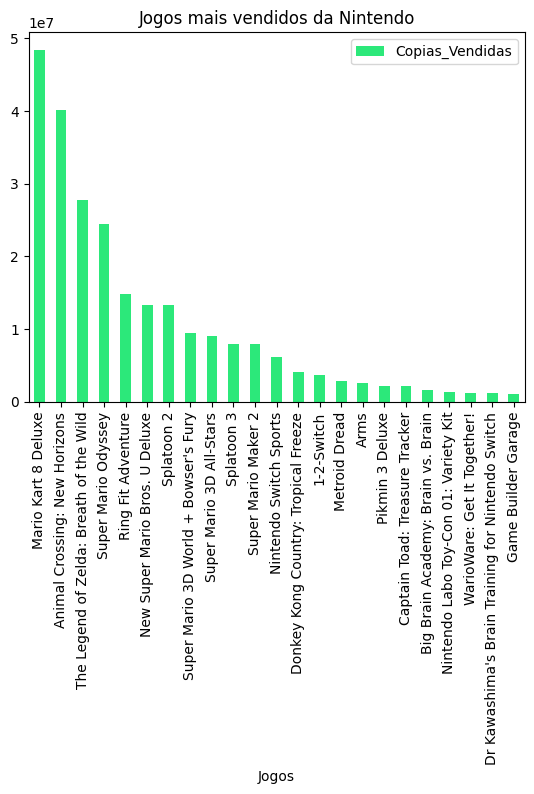

In [21]:
nin = dataset.loc[dataset['Desenvolvedor'] == 'Nintendo']
nin.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#2ce87a'])
plt.title("Jogos mais vendidos da Nintendo")

Jogos mais vendidos desenvolvidos pela Bandai

Text(0.5, 1.0, 'Jogos mais vendidos da Bandai')

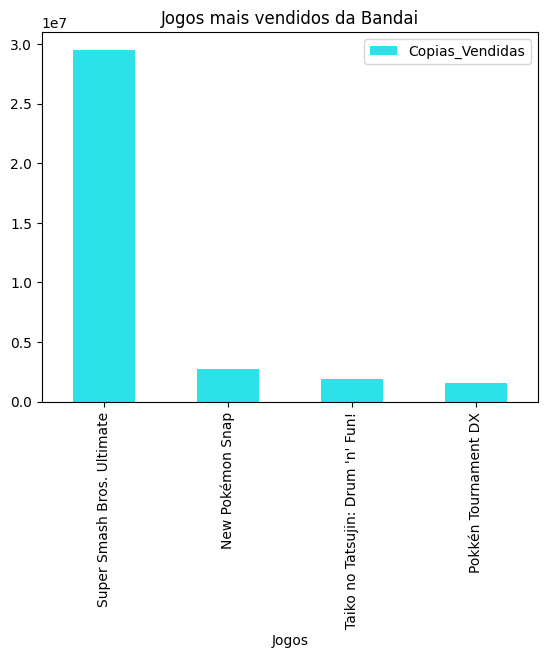

In [22]:
ban = dataset.loc[dataset['Desenvolvedor'] == 'Bandai Namco Studios']
ban.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#2ce2e8'])
plt.title("Jogos mais vendidos da Bandai")

Jogos mais vendidos desenvolvidos pela Game Freak

Text(0.5, 1.0, 'Jogos mais vendidos da Game Freak')

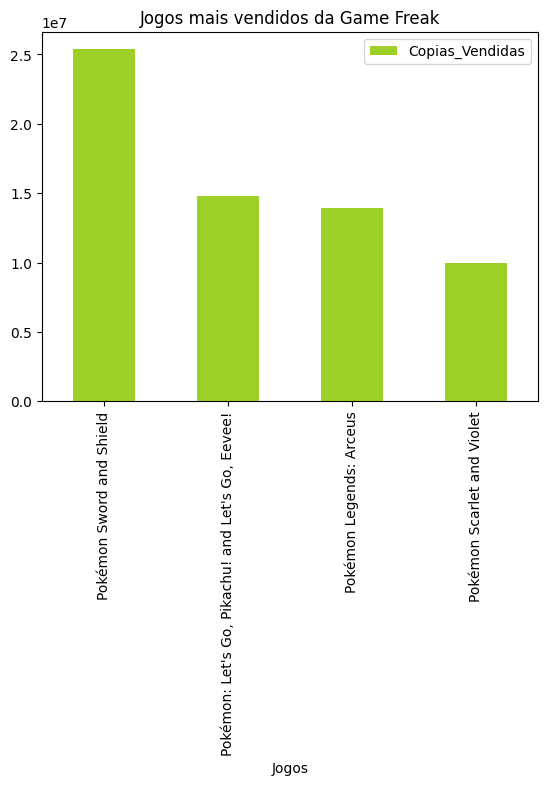

In [23]:
gaF = dataset.loc[dataset['Desenvolvedor'] == 'Game Freak']
gaF.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#9ed128'])
plt.title("Jogos mais vendidos da Game Freak")

Jogos mais vendidos desenvolvidos por outras desenvolvedoras

Text(0.5, 1.0, 'Jogos mais vendidos de outras desenvolvedoras')

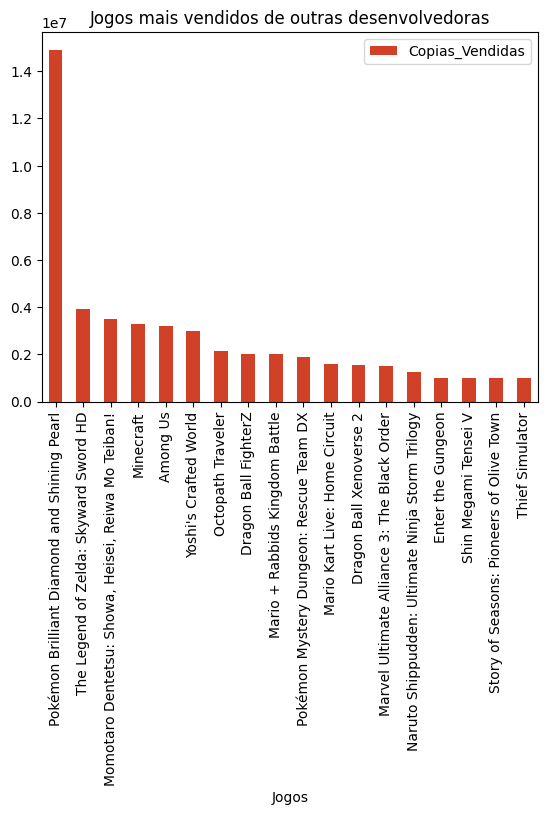

In [24]:
out = dataset.loc[dataset['Desenvolvedor'] == 'Others']
out.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#d14128'])
plt.title("Jogos mais vendidos de outras desenvolvedoras")

Análise por Publicadora.

Aqui é bom ressaltar que a Nintendo libera seus resultados de vendas trimestralmente, enquanto outras publicadoras apenas anualmente, por isso vemos seu nome com tamanha frêquencia.

In [25]:
print(pub)

Nintendo                      61
Others                         6
Bandai Namco Entertainment     4
Capcom                         2
Name: Publicador, dtype: int64


Jogos mais vendidos publicados pela Nintendo

Text(0.5, 1.0, 'Jogos mais vendidos publicados pela Nintendo')

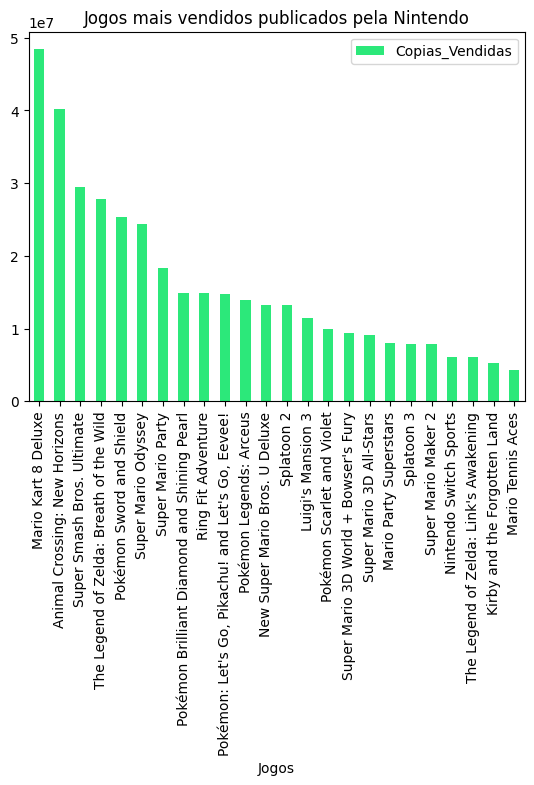

In [26]:
nint = dataset.loc[dataset['Publicador'] == 'Nintendo']
nint.iloc[:, 0:2].head(24).plot.bar(
    x='Jogos', y='Copias_Vendidas', color=['#2ce87a'])
plt.title("Jogos mais vendidos publicados pela Nintendo")

Jogos mais vendidos publicados pela Bandai

Text(0.5, 1.0, 'Jogos mais vendidos publicados pela Bandai')

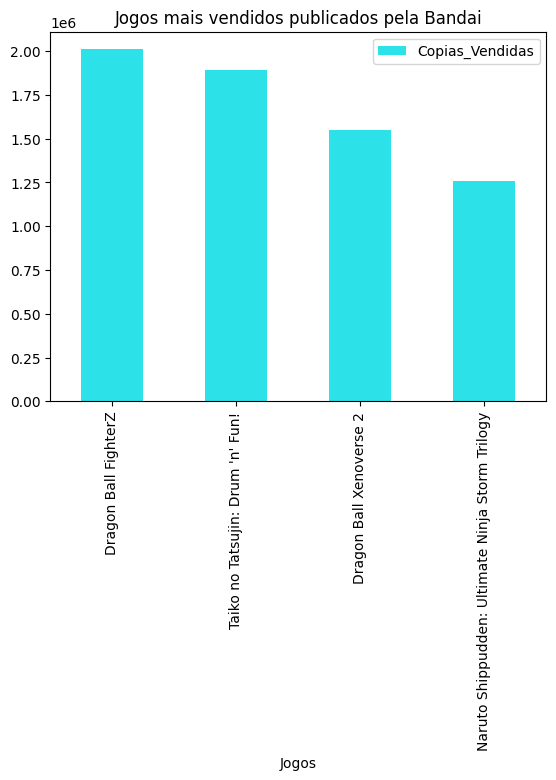

In [27]:
band = dataset.loc[dataset['Publicador'] == 'Bandai Namco Entertainment']
band.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#2ce2e8'])
plt.title("Jogos mais vendidos publicados pela Bandai")

Jogos mais vendidos publicados pela Capcom

Text(0.5, 1.0, 'Jogos mais vendidos publicados pela Capcom')

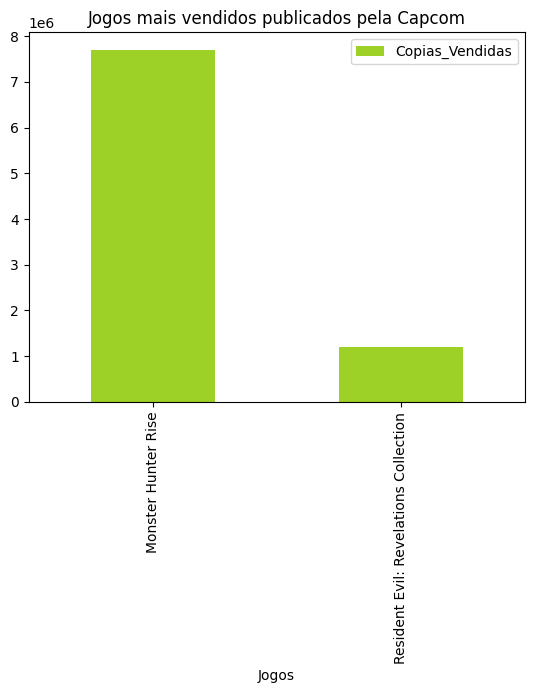

In [28]:
cap = dataset.loc[dataset['Publicador'] == 'Capcom']
cap.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#9ed128'])
plt.title("Jogos mais vendidos publicados pela Capcom")

Jogos mais vendidos publicados pelas demais publicadoras

Text(0.5, 1.0, 'Jogos mais vendidos publicados por outras publicadoras')

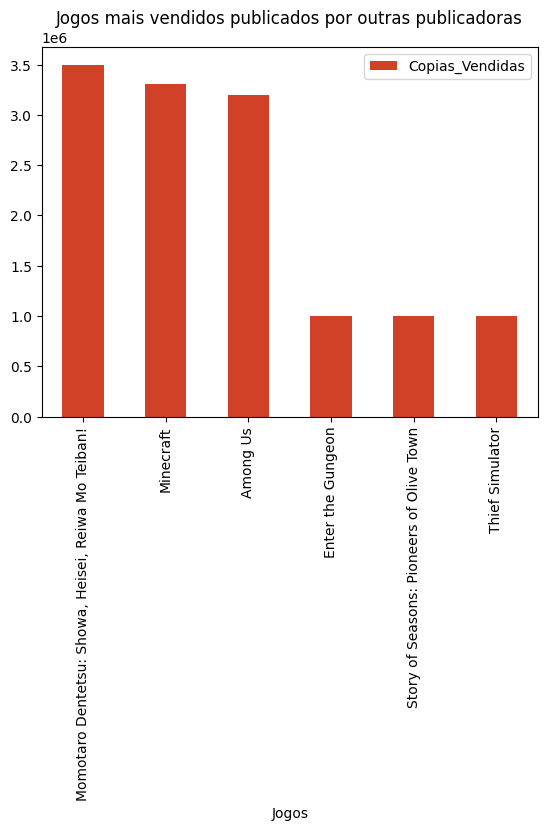

In [29]:
outr = dataset.loc[dataset['Publicador'] == 'Others']
outr.iloc[:, 0:2].plot.bar(x='Jogos', y='Copias_Vendidas', color=['#d14128'])
plt.title("Jogos mais vendidos publicados por outras publicadoras")